<a href="https://colab.research.google.com/github/NazwaIsmara/stistika/blob/main/NazwaIsmara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Progress Report 1  Eksplorasi Dataset

1. Impor Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2. Membaca Dataset

In [ ]:
df = pd.read_csv('2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


3. Melihat Struktur Dataset

In [ ]:
df.shape          # Jumlah baris dan kolom

(156, 9)

In [ ]:
df.info()         # Tipe data dan null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
df.columns        # Nama-nama kolom

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

4. Statistik Deskriptif

In [ ]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


5. Cek Missing Values

In [ ]:
df.isnull().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


6. Histogram (Distribusi Score)

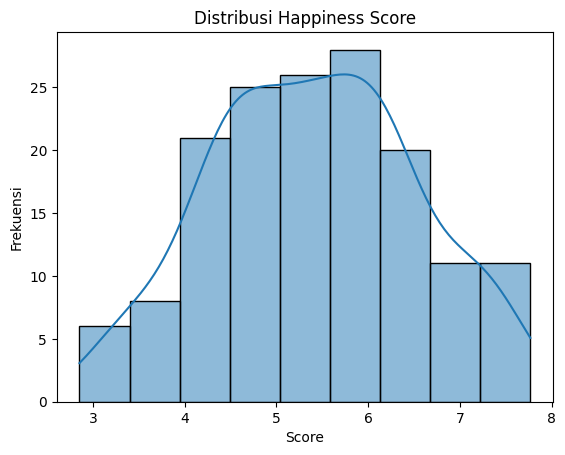

In [ ]:
sns.histplot(df['Score'], kde=True)
plt.title('Distribusi Happiness Score')
plt.xlabel('Score')
plt.ylabel('Frekuensi')
plt.show()

7. Boxplot (GDP per Capita)

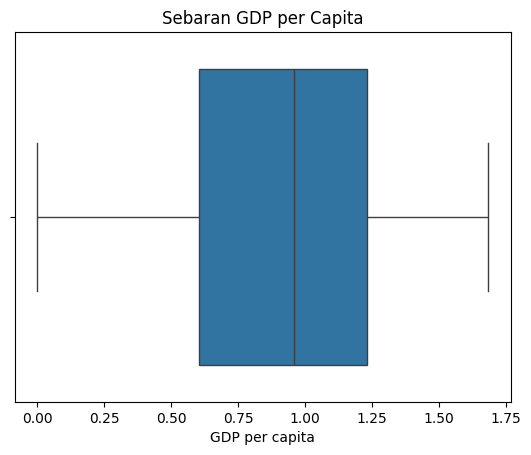

In [ ]:
sns.boxplot(x=df['GDP per capita'])
plt.title('Sebaran GDP per Capita')
plt.show()

8. Bar Chart teks tebal10 Negara Paling Bahagia

<ipython-input-15-2363791975>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Score', y='Country or region', palette='viridis')


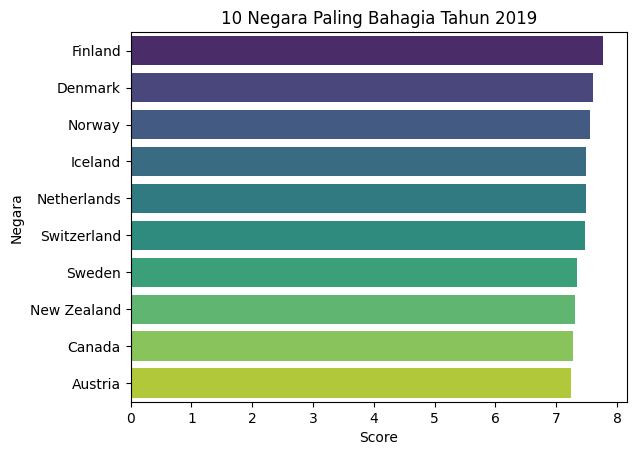

In [ ]:
top10 = df.sort_values(by='Score', ascending=False).head(10)
sns.barplot(data=top10, x='Score', y='Country or region', palette='viridis')
plt.title('10 Negara Paling Bahagia Tahun 2019')
plt.xlabel('Score')
plt.ylabel('Negara')
plt.show()

9. Heatmap Korelasi

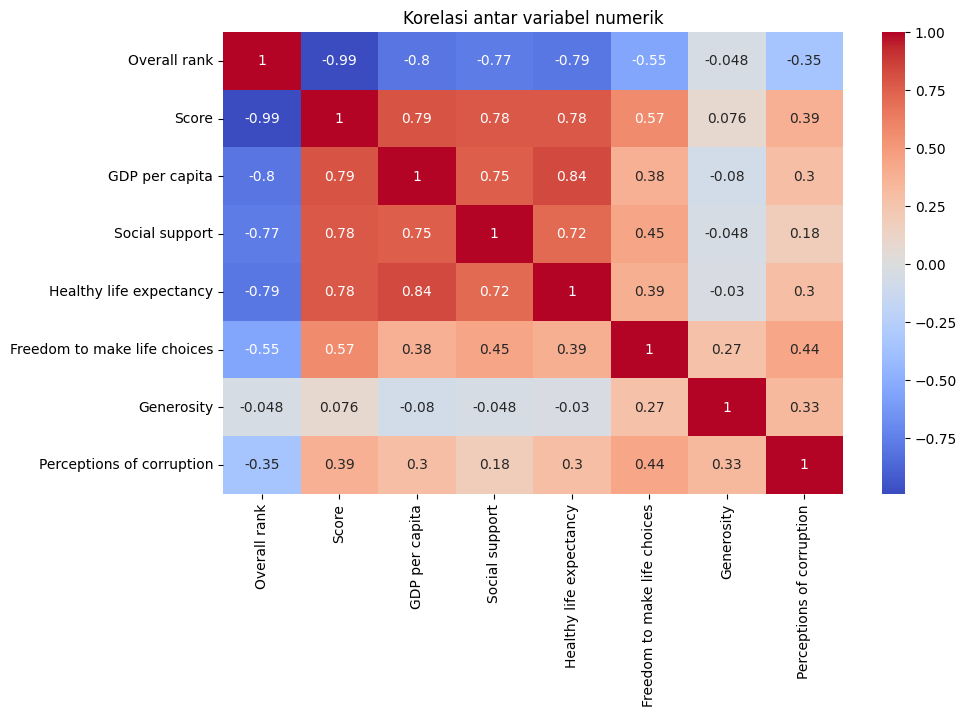

In [ ]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar variabel numerik')
plt.show()

10. Scatterplot GDP vs Score

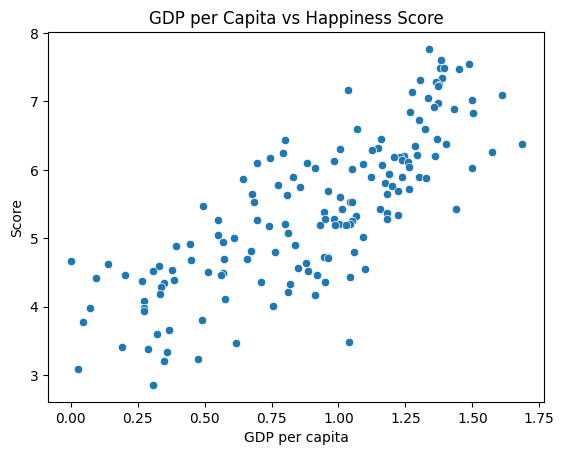

In [ ]:
sns.scatterplot(data=df, x='GDP per capita', y='Score')
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.show()

Progress Report 2  Uji Statistik

1. Uji Korelasi Pearson dan Spearman

In [ ]:
from scipy.stats import pearsonr, spearmanr

# Uji Korelasi Pearson
pearson_corr, pearson_p = pearsonr(df['GDP per capita'], df['Score'])

# Uji Korelasi Spearman
spearman_corr, spearman_p = spearmanr(df['GDP per capita'], df['Score'])

# Menampilkan hasil
print(f"Pearson correlation: {pearson_corr:.4f}, P-value: {pearson_p:.4f}")
print(f"Spearman correlation: {spearman_corr:.4f}, P-value: {spearman_p:.4f}")


Pearson correlation: 0.7939, P-value: 0.0000
Spearman correlation: 0.8145, P-value: 0.0000


2. Visualisasi Korelasi (Scatterplot)

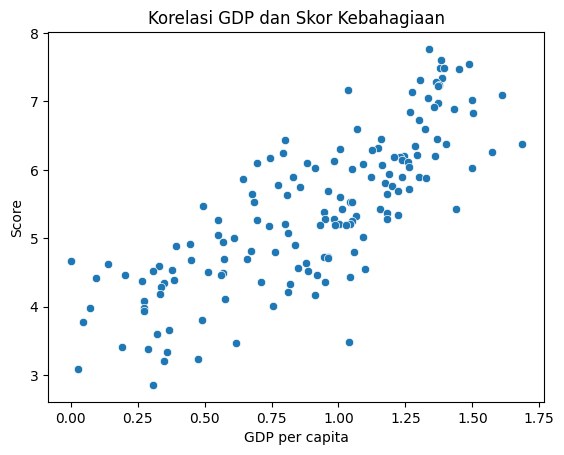

In [ ]:
sns.scatterplot(data=df, x='GDP per capita', y='Score')
plt.title('Korelasi GDP dan Skor Kebahagiaan')
plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.show()

Regresi Linear Sederhana (Analisis Statistik)

In [ ]:
import statsmodels.api as sm

# Definisikan variabel X (independen) dan y (dependen)
X = df['GDP per capita']
y = df['Score']

# Tambahkan konstanta (intercept)
X = sm.add_constant(X)

# Buat dan latih model regresi
model = sm.OLS(y, X).fit()

# Tampilkan ringkasan model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     262.5
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           4.32e-35
Time:                        16:58:31   Log-Likelihood:                -159.97
No. Observations:                 156   AIC:                             323.9
Df Residuals:                     154   BIC:                             330.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.3993      0.135     25.

Visualisasi Regresi (Garis Tren)

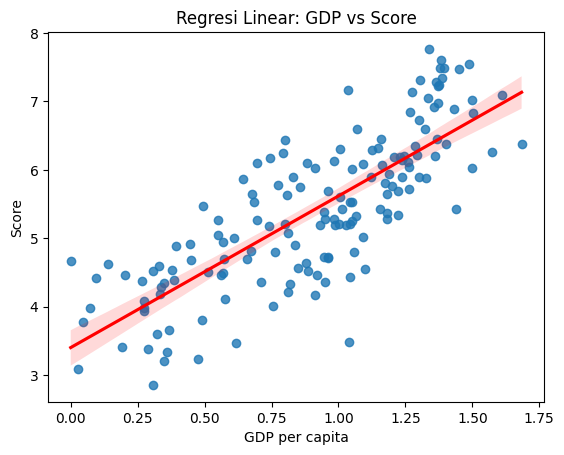

In [ ]:
sns.regplot(x='GDP per capita', y='Score', data=df, line_kws={"color": "red"})
plt.title('Regresi Linear: GDP vs Score')
plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.show()

Progress Report 3  Laporan Akhir dan Insight

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr
%matplotlib inline

2. Baca dan Tampilkan Dataset

In [ ]:
df = pd.read_csv('2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


3. Statistik Deskriptif & Korelasi

In [ ]:
# Statistik deskriptif
df.describe()

# Korelasi hanya untuk kolom numerik
df.select_dtypes(include=np.number).corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


4. Visualisasi Ringkasan Laporan Akhir

Bar Chart 10 Negara Paling Bahagia

<ipython-input-33-2363791975>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Score', y='Country or region', palette='viridis')


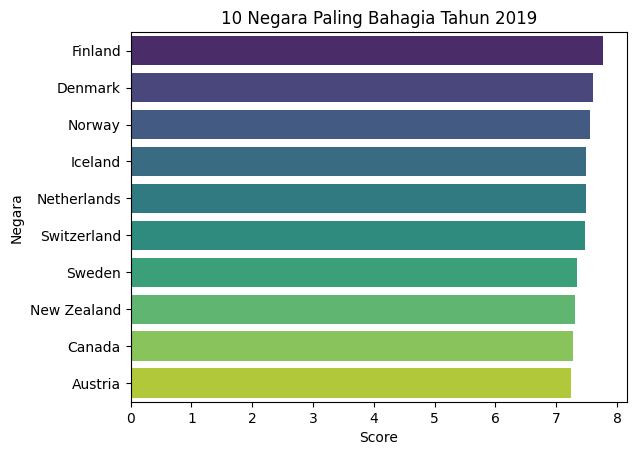

In [ ]:
top10 = df.sort_values(by='Score', ascending=False).head(10)
sns.barplot(data=top10, x='Score', y='Country or region', palette='viridis')
plt.title('10 Negara Paling Bahagia Tahun 2019')
plt.xlabel('Score')
plt.ylabel('Negara')
plt.show()

Heatmap Korelasi Final

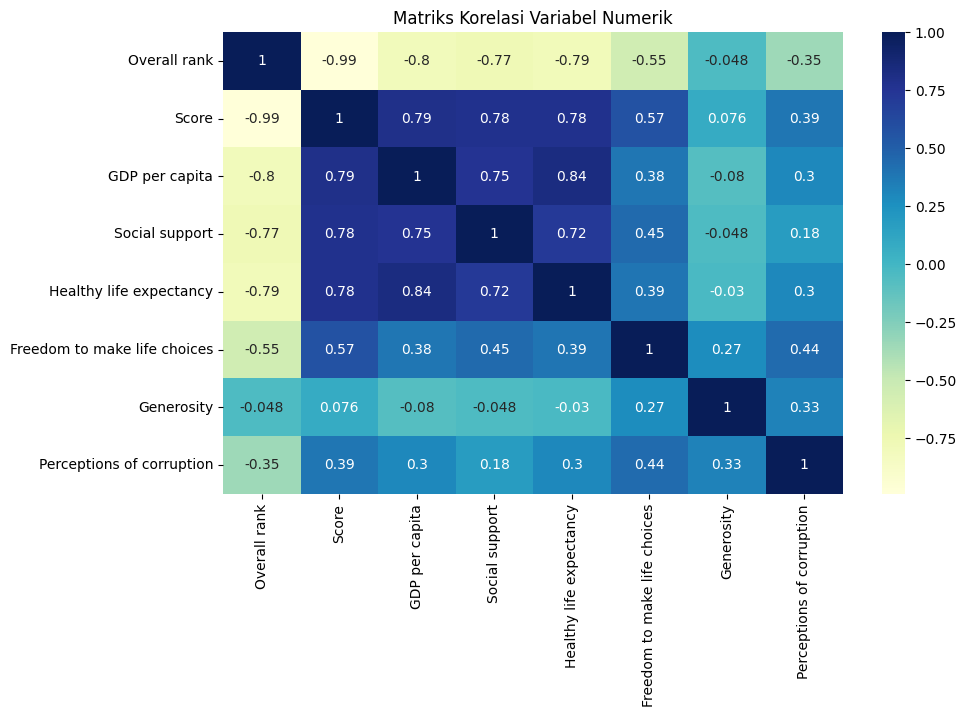

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='YlGnBu')
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

Scatterplot + Garis Regresi

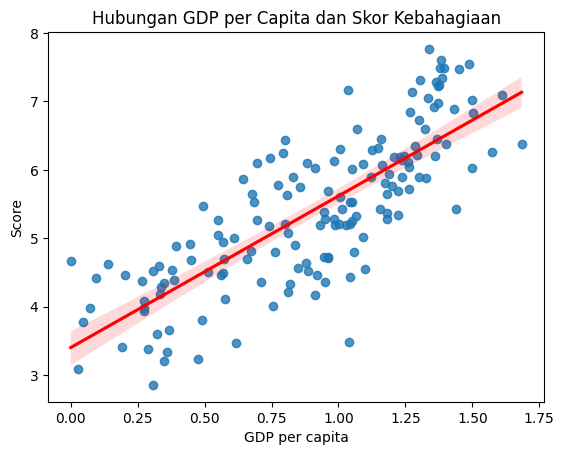

In [ ]:
sns.regplot(x='GDP per capita', y='Score', data=df, line_kws={"color": "red"})
plt.title('Hubungan GDP per Capita dan Skor Kebahagiaan')
plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.show()

Negara dengan GDP Rendah tapi Skor Tinggi (Outlier)

In [ ]:
df[df['GDP per capita'] < 0.8].sort_values(by='Score', ascending=False).head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
34,35,El Salvador,6.253,0.794,1.242,0.789,0.430,0.093,0.074
40,41,Uzbekistan,6.174,0.745,1.529,0.756,0.631,0.322,0.240
44,45,Nicaragua,6.105,0.694,1.325,0.835,0.435,0.200,0.127
58,59,Honduras,5.860,0.642,1.236,0.828,0.507,0.246,0.078
60,61,Bolivia,5.779,0.776,1.209,0.706,0.511,0.137,0.064


5. Uji Statistik Akhir (Jika Perlu Re-run)

Korelasi

In [ ]:
pearson_corr, p_val = pearsonr(df['GDP per capita'], df['Score'])
print(f"Pearson correlation: {pearson_corr:.4f}, P-value: {p_val:.4f}")

Pearson correlation: 0.7939, P-value: 0.0000


Regresi

In [ ]:
X = sm.add_constant(df['GDP per capita'])
model = sm.OLS(df['Score'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     262.5
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           4.32e-35
Time:                        17:26:42   Log-Likelihood:                -159.97
No. Observations:                 156   AIC:                             323.9
Df Residuals:                     154   BIC:                             330.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.3993      0.135     25.

6. Tampilkan Ringkasan Insight

Insight dan Interpretasi

- Rata-rata skor kebahagiaan dunia tahun 2019 adalah sekitar 5,4.
- GDP per capita menunjukkan korelasi kuat (r = 0.79) terhadap skor kebahagiaan.
- Hasil regresi linear sederhana menunjukkan bahwa GDP per capita secara signifikan memengaruhi skor kebahagiaan dengan p-value < 0.05.
- Sekitar 62% variasi skor kebahagiaan dapat dijelaskan oleh GDP per capita (R² = 0.62).
- Meski GDP penting, terdapat negara dengan GDP sedang tapi skor kebahagiaannya tinggi (misal: Costa Rica), yang menunjukkan peran faktor non-ekonomi seperti dukungan sosial dan kebebasan.
